# 02 Neural Network Classifiction with Pytorch 

Classification is a problem of predecting wherther something is one thing or another (there can be multiple thing as the option)

# 1. Making Classification Data and get ready

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch

In [2]:
#making 1000 samples
n_sample = 1000

#creating circles 
X , y  = make_circles(n_sample, noise=0.03 ,random_state=42)

In [3]:
len(X) , len(y)

(1000, 1000)

In [4]:
#printing the first 5 sample of X and y
print(f"X {X[:5]}")
print(f"y {y[:5]}")

X [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y [1 1 1 1 0]


In [5]:
#create a dataframe of circle data
circles  = pd.DataFrame({"X1": X[: , 0],
                        "X2" : X[:, 1],
                       "y": y})

In [6]:
circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


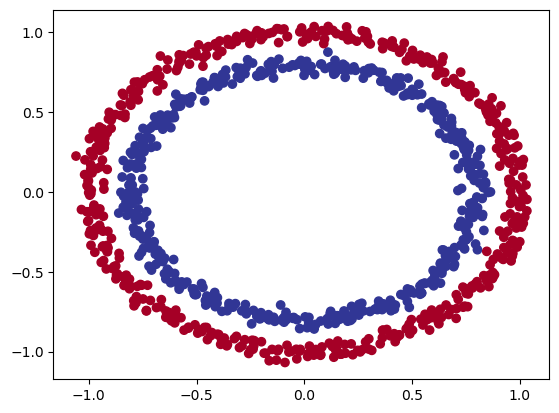

In [7]:
#Data Expolorer moto Visaulize Visualize Visualize  Now we are going to visualize all of this number to get better understanding
plt.scatter(x=circles.X1, y=circles.X2 , c=circles.y , cmap=plt.cm.RdYlBu);

# 1.1 Checking the shapes of Features and labels

In [8]:
X.shape , y.shape

((1000, 2), (1000,))

In [9]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
#view the first exmpale of features and lablels
X_samples = X[0]
y_sample  = y[0]

print(f"Value from one sample of X {X_samples} and same for the y {y_sample}")
print(f"Shape from one sample of X{X_samples.shape} and shape of y {y_sample.shape}")

Value from one sample of X [0.75424625 0.23148074] and same for the y 1
Shape from one sample of X(2,) and shape of y ()


# 1.2 Converting data into tensor and crating train and test split

In [11]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
type(X) , X.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

Now our Data is into pytorch tensors

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2 ,random_state=42)

In [14]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

# 2. Build a Model
let's build a model to classify red and blue dot's
To do so, we want to 
1. contstruct a model by subclassing(`nn.Module`)
2. Define loss and optimizer
3. Build a training loop

In [15]:
from torch import nn

In [16]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=1, out_features=5)
        self.layer_2 = nn.Linear(in_features=5 , out_features=1)
        
    def forward(self,x):
        return self.layer_2(self.layer_1(x))

In [17]:
model_0 = CircleModelV0()

In [18]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=1, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
# let's replicate the model using nn.seqential
model_0 = nn.Sequential(
nn.Linear(in_features=2,out_features=5),
nn.Linear(in_features=5,out_features=1))

In [20]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6495, -0.5121],
                      [-0.1342,  0.3714],
                      [-0.0713, -0.5077],
                      [-0.4424, -0.1120],
                      [ 0.4730, -0.5301]])),
             ('0.bias', tensor([-0.4022,  0.0829,  0.5074,  0.5814, -0.1727])),
             ('1.weight',
              tensor([[ 0.1451, -0.4422, -0.1716, -0.4300,  0.2646]])),
             ('1.bias', tensor([0.3172]))])

In [22]:
#lets do the predection from untrained model
with torch.inference_mode():
    untrain_predictions = model_0(X_test)
print(f"Lenght of Predictions {len(untrain_predictions)} Shape: {untrain_predictions.shape}")
print(f"Length of test sample {len(X_test)} Shape {X_test.shape}")
print(f"\n First 10 Predictions\n {untrain_predictions[:10]}")
print(f"\n First 10 Test Sample \n {y_test[:10]}")

Lenght of Predictions 200 Shape: torch.Size([200, 1])
Length of test sample 200 Shape torch.Size([200, 2])

 First 10 Predictions
 tensor([[-0.4367],
        [-0.3898],
        [-0.2898],
        [-0.4794],
        [ 0.1383],
        [ 0.1635],
        [-0.0439],
        [ 0.0868],
        [-0.3080],
        [-0.3820]])

 First 10 Test Sample 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup a loss function and optimizer

which loss function or optimizer should you use?

Again... this is the problem specfic

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy or categorical cross cross entropy.

As a reminder, the loss function measure how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and ADAM, however pytorch has many built in options.

* for the loss function we are going to use `torch.nn.BECWithLogitLoss` 

In [23]:
#setup the loss function
loss_fn = nn.BCEWithLogitsLoss()

Optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [24]:
#Calcualte the accuracy - out of the 100 examples, what precnetage does our model get right?
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Training Loop
1. Forwarad pass
2. Calculate the loss
3. Optimizer Zero Grad
4. Loss Backwards
5. Optimizer Step

## 3.1 Going From Raw logits -> Prediction probabilites -> Prediction labels

our model output are going to be raw logit

we can convert these **logits** into the **prediction probabilites** by passing them into some kind of activation function (e.g. sigmoid for 
binary class classification and sigmoid for multiclass classificatoin)

Then we can convert our model prediction probabilites to **prediction lables** by either rounding them or taking the `argmax()`

In [25]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.4367],
        [-0.3898],
        [-0.2898],
        [-0.4794],
        [ 0.1383]])

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [27]:
#use the sigmoid activation function to convert our model logits into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3925],
        [0.4038],
        [0.4281],
        [0.3824],
        [0.5345]])

In [28]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]])

for our prediction probabilties we need need perform a range style round them
* `y_preds_prob` >= 0.5 , `y=1`
* `y_preds_prob` < 0.5  , `y=0`

In [29]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

#in full
y_preds_label = torch.round(torch.sigmoid(model_0(X_test))[:5])

#check for equality
print(torch.eq(y_preds.squeeze(), y_preds_label.squeeze()))

#get rid from extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.])

In [30]:
y_preds.squeeze()

tensor([0., 0., 0., 0., 1.])

In [31]:
y_preds_label.squeeze()

tensor([0., 0., 0., 0., 1.], grad_fn=<SqueezeBackward0>)

In [32]:
#Training loop
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_0.train()
    
    #1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_preds  = torch.round(torch.sigmoid(y_logits))
    
    #2. Calculate the loss
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_preds)
    
    #3. Optimizer Zero grad
    Optimizer.zero_grad()
    
    #4. Loss backwards (backpropgation)
    loss.backward()
    
    #5. Optimizer step
    Optimizer.step()
    
    # Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred   = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        test_acc  = accuracy_fn(y_true=y_test,y_pred=test_pred)
        
    if epoch % 10 == 0:
        print(f"Epochs: {epoch} | Loss: {loss:.5f} | Accuracy {acc:.2f}% | Test Loss {test_loss:.5f} |  Test Acc {test_acc:.2f}% ")


Epochs: 0 | Loss: 0.70437 | Accuracy 48.25% | Test Loss 0.70153 |  Test Acc 46.50% 
Epochs: 10 | Loss: 0.70380 | Accuracy 48.38% | Test Loss 0.70100 |  Test Acc 47.00% 
Epochs: 20 | Loss: 0.70328 | Accuracy 48.50% | Test Loss 0.70052 |  Test Acc 48.00% 
Epochs: 30 | Loss: 0.70281 | Accuracy 48.38% | Test Loss 0.70008 |  Test Acc 48.00% 
Epochs: 40 | Loss: 0.70237 | Accuracy 48.50% | Test Loss 0.69968 |  Test Acc 48.50% 
Epochs: 50 | Loss: 0.70196 | Accuracy 48.62% | Test Loss 0.69931 |  Test Acc 48.00% 
Epochs: 60 | Loss: 0.70159 | Accuracy 48.62% | Test Loss 0.69897 |  Test Acc 47.00% 
Epochs: 70 | Loss: 0.70124 | Accuracy 49.12% | Test Loss 0.69866 |  Test Acc 46.50% 
Epochs: 80 | Loss: 0.70092 | Accuracy 49.25% | Test Loss 0.69838 |  Test Acc 46.50% 
Epochs: 90 | Loss: 0.70061 | Accuracy 49.12% | Test Loss 0.69812 |  Test Acc 46.50% 


## 4. Making Predictions and evaluating the model

From metrics it's look like our model isn't learning anything...

So to inspect it let's make some predictions and make them visualize!

In other words "Visualize Visualize Visualize"

In [33]:
import requests
from pathlib import Path

#Downloading helper function from learn pytorch repo
if Path("helper_function.py").is_file():
    print("Helper function is already exist")
else:
    print("Downloading helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py",'wb') as f:
        f.write(request.content)
from helper_function import plot_predictions , plot_decision_boundary

Helper function is already exist


C:\Users\FUJITSU\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


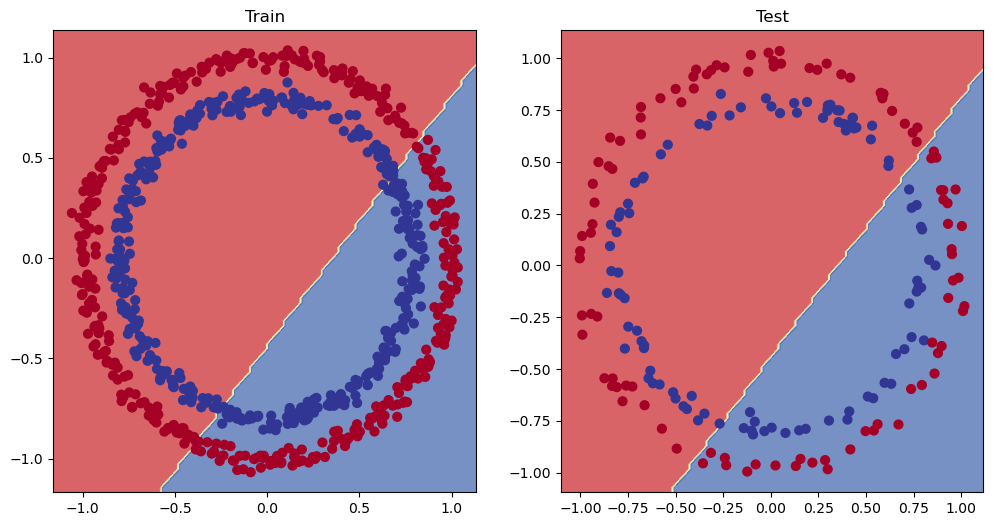

In [34]:
#Plot the predictions
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving Model (From Model prespective)
* Add more layers - give the model more chances to learn about data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Changing learning rate
* Change the loss function


These options are all from model prespective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning enginner and data scientist) can change, they are reffered as a **hyperparameter**.

In [35]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [36]:
model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [38]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [39]:
#Training Loop
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    
    model_1.train()
    
    #Forward Pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # optimizer zero grad
    optimizer.zero_grad()
    
    # Loss Backward
    loss.backward()
    
    #optimizer step (Gradient Descent)
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # Forward Pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #Calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Training Loss {loss:.5f} Testing Accuracy {acc:.2f} Testing Loss {test_loss} Testing Accuracy {test_acc:.2f}")
        

Epoch 0 Training Loss 0.69396 Testing Accuracy 50.88 Testing Loss 0.6926146745681763 Testing Accuracy 51.00
Epoch 100 Training Loss 0.69305 Testing Accuracy 50.38 Testing Loss 0.6937904357910156 Testing Accuracy 48.00
Epoch 200 Training Loss 0.69299 Testing Accuracy 51.12 Testing Loss 0.6943727135658264 Testing Accuracy 46.00
Epoch 300 Training Loss 0.69298 Testing Accuracy 51.62 Testing Loss 0.6945767998695374 Testing Accuracy 45.00
Epoch 400 Training Loss 0.69298 Testing Accuracy 51.12 Testing Loss 0.6946452260017395 Testing Accuracy 46.00
Epoch 500 Training Loss 0.69298 Testing Accuracy 51.00 Testing Loss 0.6946679949760437 Testing Accuracy 46.00
Epoch 600 Training Loss 0.69298 Testing Accuracy 51.00 Testing Loss 0.694675624370575 Testing Accuracy 46.00
Epoch 700 Training Loss 0.69298 Testing Accuracy 51.00 Testing Loss 0.6946781873703003 Testing Accuracy 46.00
Epoch 800 Training Loss 0.69298 Testing Accuracy 51.00 Testing Loss 0.6946792006492615 Testing Accuracy 46.00
Epoch 900 Tra

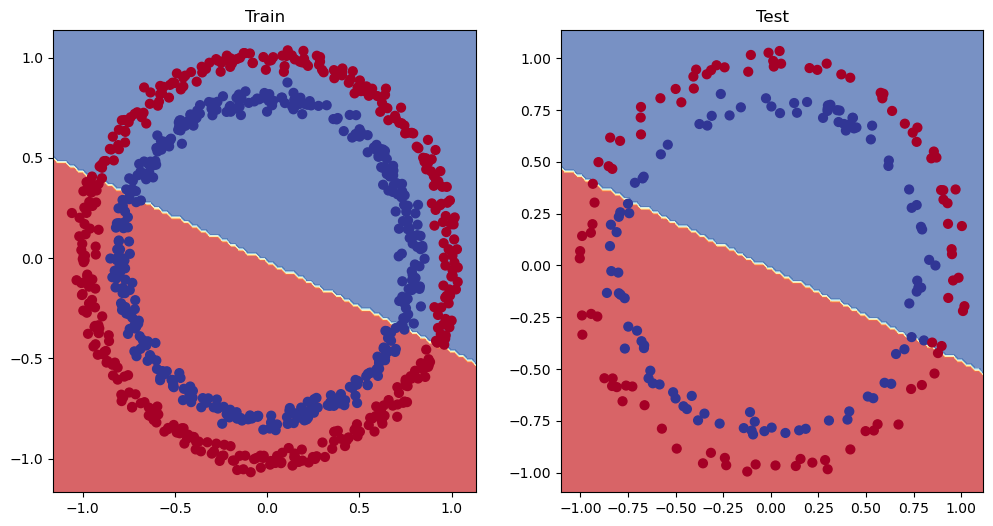

In [40]:
#Plot the predictions
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Preparing data to see if our model can fit to the straight line
One way to troubleshoot to a larger problems is to our smaller problem

In [41]:
weight = 0.7
bias  = 0.3
start = 0
end = 1
step  = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

len(X_regression)


100

In [42]:
train_split = int(0.8 * len(X_regression))
X_regression_train , y_regression_train = X_regression[:train_split] , y_regression[:train_split]
X_regression_test , y_regression_test  = X_regression[train_split:] , y_regression[train_split:]
print(len(X_regression_train),len(y_regression_train) , len(X_regression_test) , len(y_regression_test))

80 80 20 20


In [43]:
X_regression_test[:5]

tensor([[0.8000],
        [0.8100],
        [0.8200],
        [0.8300],
        [0.8400]])

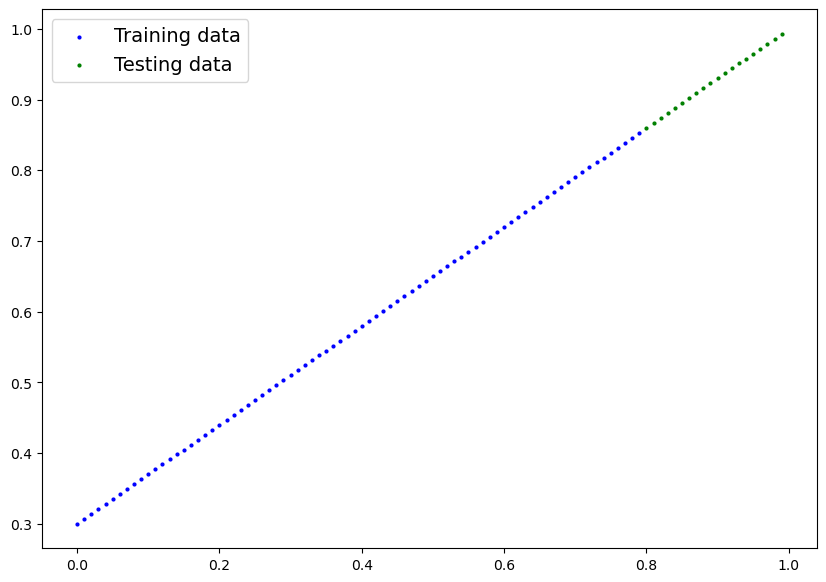

In [44]:
plot_predictions(train_data=X_regression_train,
                 train_labels=y_regression_train,
                 test_data=X_regression_test,
                 test_labels=y_regression_test)

# 5.2 Adjusting model to fit straing line

In [45]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

In [46]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [47]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model_2.train()  # Set model to training mode
    y_pred = model_2(X_regression_train)
    loss = loss_fn(y_pred, y_regression_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        model_2.eval()  # Set model to evaluation mode
        with torch.no_grad():  # No need for gradient computation during evaluation
            test_pred = model_2(X_regression_test)
            test_loss = loss_fn(test_pred, y_regression_test)
        print(f"Epochs: {epoch} Training Loss {loss} Testing Loss {test_loss}")

Epochs: 0 Training Loss 0.7598584890365601 Testing Loss 0.9110288619995117
Epochs: 100 Training Loss 0.02857951819896698 Testing Loss 0.0008127152686938643
Epochs: 200 Training Loss 0.025325393304228783 Testing Loss 0.0020919740200042725
Epochs: 300 Training Loss 0.021374734118580818 Testing Loss 0.0030508041381835938
Epochs: 400 Training Loss 0.019644886255264282 Testing Loss 0.0034075051080435514
Epochs: 500 Training Loss 0.019402286037802696 Testing Loss 0.003872409462928772
Epochs: 600 Training Loss 0.019032469019293785 Testing Loss 0.0037889450322836637
Epochs: 700 Training Loss 0.018782969564199448 Testing Loss 0.0038133084308356047
Epochs: 800 Training Loss 0.01839747466146946 Testing Loss 0.003287243889644742
Epochs: 900 Training Loss 0.017980322241783142 Testing Loss 0.003603690769523382


In [48]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_regression_test)

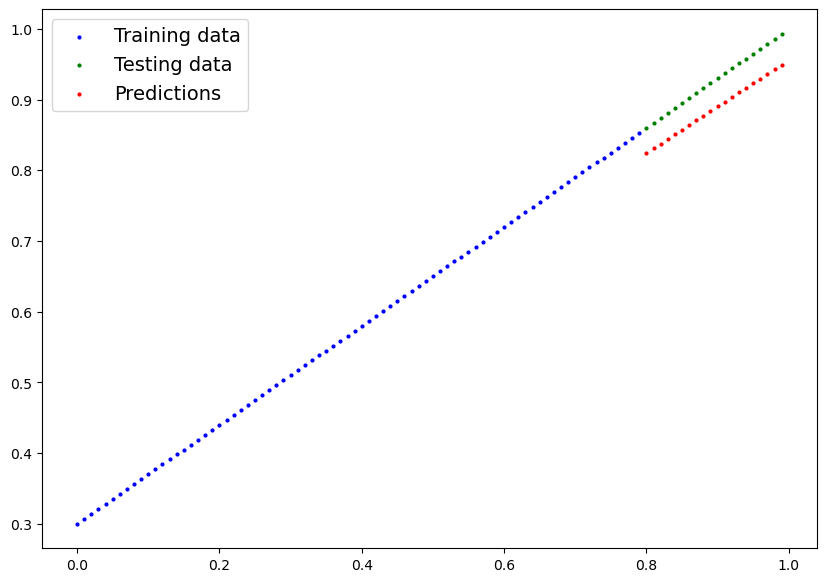

In [49]:
plot_predictions(train_data=X_regression_train,
                 train_labels=y_regression_train,
                 test_data=X_regression_test,
                 test_labels=y_regression_test,
                predictions=y_preds)